In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

# Read data

In [7]:
listings_file_path = 'data/airbnb/listings.csv'
al_file_path = 'data/Alojamento_Local.csv'
df_al = pd.read_csv(al_file_path)
df_listings = pd.read_csv(listings_file_path)

# General schema

![Star schema](schema.png)

## Merge df_listings with alojamento_local.csv

In [3]:
def intTryParse(value):
    try:
        a = int(value)
        return True
    except ValueError:
        return False

In [4]:
#get only listings where 'license' is not null && != 'Exempt'
df_listings_with_license = df_listings[(~df_listings['license'].isnull())&(df_listings['license'] != 'Exempt')]

#string replace
df_listings_with_license['NrRNAL'] = [s.replace('/AL','').replace('.','') for s in df_listings_with_license['license']]

#get only records where license nr can be converted to int 
df_listings_with_license = df_listings_with_license[[intTryParse(s) for s in df_listings_with_license['NrRNAL']]]

#convert NrRNAL to int before merge the two dataframes
df_listings_with_license['NrRNAL'] = df_listings_with_license['NrRNAL'].astype(int)

#inner join two dataframes
df_result = pd.merge(df_listings_with_license, df_al, how='inner', on='NrRNAL')

/Users/air/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
print('dataset size: {}'.format(len(df_result)))

dataset size: 17168


In [6]:
list(df_result.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


# Exploratory data analysis

In [8]:
def missing_data(df, columns):
    df_graph = df[columns]
    #missing data
    total = df_graph.isnull().sum().sort_values(ascending=False)
    percent = (df_graph.isnull().sum()/df_graph.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x='index',y = 'Percent', data= missing_data.reset_index())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return ax

def feature_dist(df, column_name):
    plt.figure(figsize=(15,4))
    sns.distplot(df[column_name] , fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[column_name])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(column_name))
    plt.show()

#IN BAR CHARTS, SET PERCENTAGES ABOVE EACH BAR
def set_bar_percentage(ax, df):
    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
          ha='center', va='center', rotation=0, xytext=(0, 10),
          textcoords='offset points')
        
#IN BAR CHARTS, SET THE VALUE ABOVE EACH BAR
def set_bar_amount(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate("{0:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', rotation=0, xytext=(0, 10),
            textcoords='offset points')
        
#Simple plot
def simple_plot(df,column):
    bx = sns.catplot(x=column,data=df, kind='count')
    (bx.set_axis_labels(column, "Count")
        .set_titles("{col_name} {col_var}")
        .despine(left=True))

## Missing data

                             Total   Percent
review_scores_location        2170  0.126398
review_scores_communication   2169  0.126340
review_scores_accuracy        2168  0.126281
review_scores_cleanliness     2167  0.126223
review_scores_rating          2166  0.126165


Text(0.5, 1.0, 'Review dimension missing values')

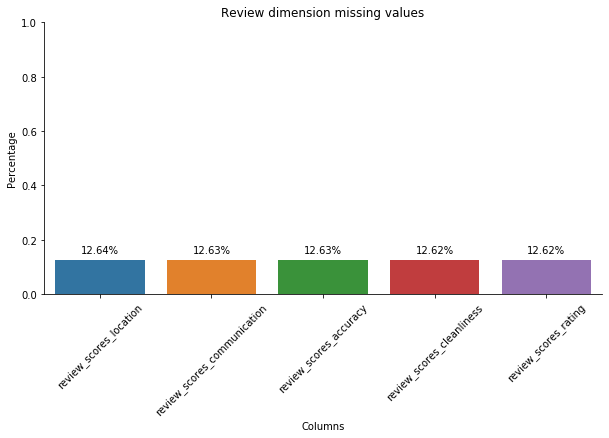

In [10]:
columns = [
'review_scores_rating', 
'review_scores_accuracy', 
'review_scores_cleanliness', 
'review_scores_communication', 
'review_scores_location', 
]

ax = missing_data(df_result,columns)
set_bar_amount(ax)
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage')
plt.ylim(0,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Review dimension missing values')

## Review dimension


 mu = 92.67 and sigma = 8.07



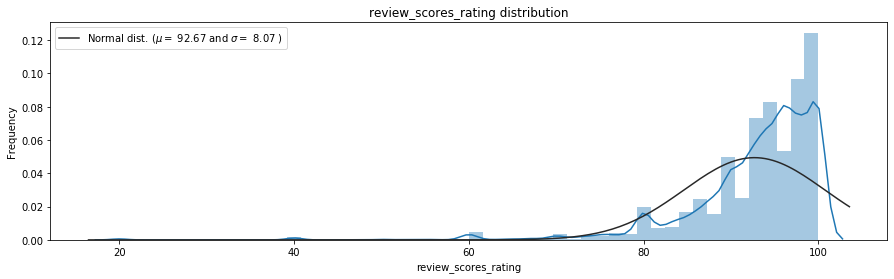


 mu = 9.59 and sigma = 0.79



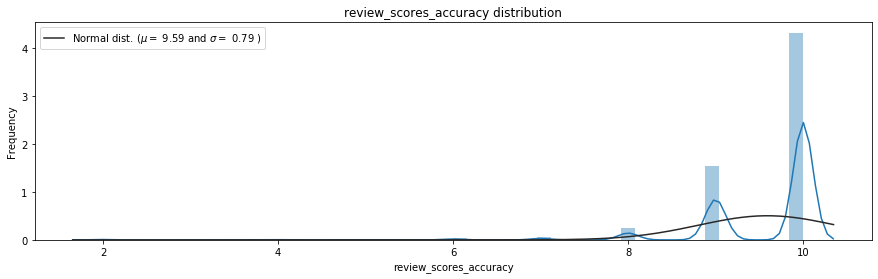


 mu = 9.48 and sigma = 0.84



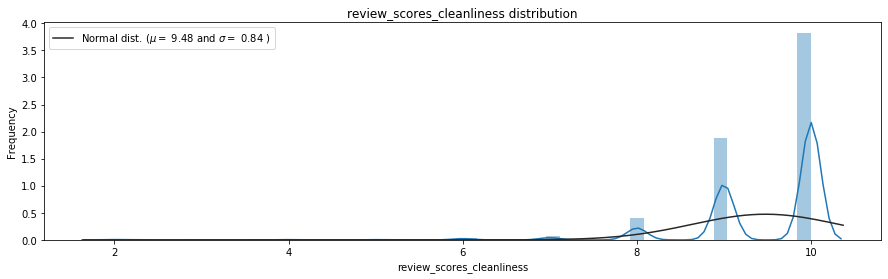


 mu = 9.67 and sigma = 0.76



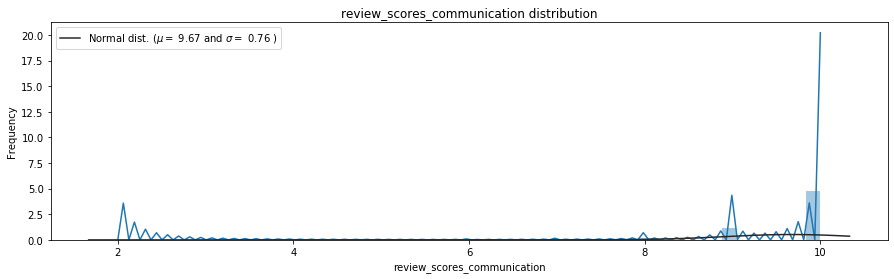


 mu = 9.56 and sigma = 0.70



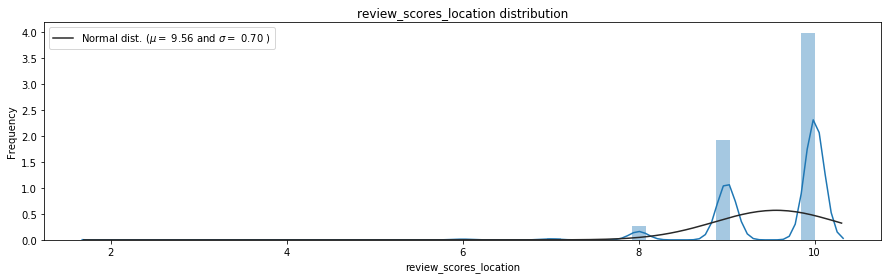

In [37]:
columns = [
'review_scores_rating', 
'review_scores_accuracy', 
'review_scores_cleanliness',  
'review_scores_communication', 
'review_scores_location', 
]
      
for c in columns: 
    feature_dist(df_result[~df_result[c].isnull()],c)

Rating

In [20]:
df_result['rating'] = pd.qcut(df_listings['review_scores_rating'],5, duplicates='drop')
df_result.rating.value_counts()

(88.0, 93.0]      3954
(93.0, 96.0]      3537
(96.0, 99.0]      3281
(19.999, 88.0]    2898
(99.0, 100.0]     1738
Name: rating, dtype: int64

Accuracy, Cleanliness, Communication, Location - all of them are divided into two categories: bellow or above 9.0

In [42]:
df_result['accuracy'] = pd.qcut(df_listings['review_scores_accuracy'],5, duplicates='drop')
df_result.accuracy.value_counts()

(9.0, 10.0]     10317
(1.999, 9.0]     5080
Name: accuracy, dtype: int64

In [44]:
df_result['cleanliness'] = pd.qcut(df_listings['review_scores_cleanliness'],5, duplicates='drop')
df_result.cleanliness.value_counts()

(9.0, 10.0]     8910
(1.999, 9.0]    6492
Name: cleanliness, dtype: int64

In [46]:
df_result['communication'] = pd.qcut(df_listings['review_scores_communication'],5, duplicates='drop')
df_result.communication.value_counts()

(9.0, 10.0]     11766
(1.999, 9.0]     3630
Name: communication, dtype: int64

In [47]:
df_result['location'] = pd.qcut(df_listings['review_scores_location'],5, duplicates='drop')
df_result.location.value_counts()

(9.0, 10.0]     9286
(1.999, 9.0]    6107
Name: location, dtype: int64